# Finding Heavy Traffic Indicators on I-94

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## The i-94 Traffic Dataset

John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository]('https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume').

We'll use [pandas](https://pandas.pydata.org/) python library to start exploring the dataset.

We'll examine the first and the last five rows with [DataFrame.head()]('https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head') and [DataFrame.tails()]('https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html?highlight=tail#pandas.DataFrame.tail') corresponding.

We'll use [DataFrame.info()]('https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info') to find more information about the dataset.

In [1]:
import pandas as pd
i94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analyzing Traffic Volume

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic.

We'll going to plot a histogram to visualize the distribution of the `traffic_volume` column.

We'll use [Matplotlib]('https://matplotlib.org/stable/index.html') to make plots. When we use Matplotlib inside Jupyter, we also need to add the `%matplotlib inline magic` — this enables Jupyter to generate the graphs.

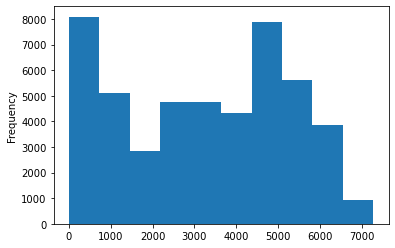

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

i94['traffic_volume'].plot.hist()
plt.show()

In [5]:
i94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time the hourly traffic volume was on average 1,193 cars, maybe in the night or when the weather is worse. 

About 25% of the time, the traffic volume was on average 4,933 cars, maybe in the day in the morning or the afternoon.

# Traffic Volume: Day vs. Night

We'll exploring the possibility that `nighttime` and `daytime` might influence traffic volume.

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

We'll use [pd.to_datetime]('https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html?highlight=to_datetime') function to convert `date_time` column values to Datetime dtype. 

In [11]:
i94['date_time'] = pd.to_datetime(i94['date_time'])

We use the [Series.dt]('https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html?highlight=dt#pandas.Series.dt') function to access to hour values.

In [49]:
daytime = i94[i94['date_time'].dt.hour.between(7,18)]
daytime.shape

(23877, 9)

In [50]:
nighttime = i94[(i94['date_time'].dt.hour >= 19) | (i94['date_time'].dt.hour < 7)]
nighttime.shape

(24327, 9)

We'll go to compare the traffic volume at night and during the day.

We'll use the [plt.subplot]('https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html?highlight=subplot#matplotlib.pyplot.subplot') function to plot side-by-side the histograms for  traffic volume at daty and night.


<AxesSubplot:title={'center':'Traffic Volume: Night'}, xlabel='Traffic Volume', ylabel='Frequency'>

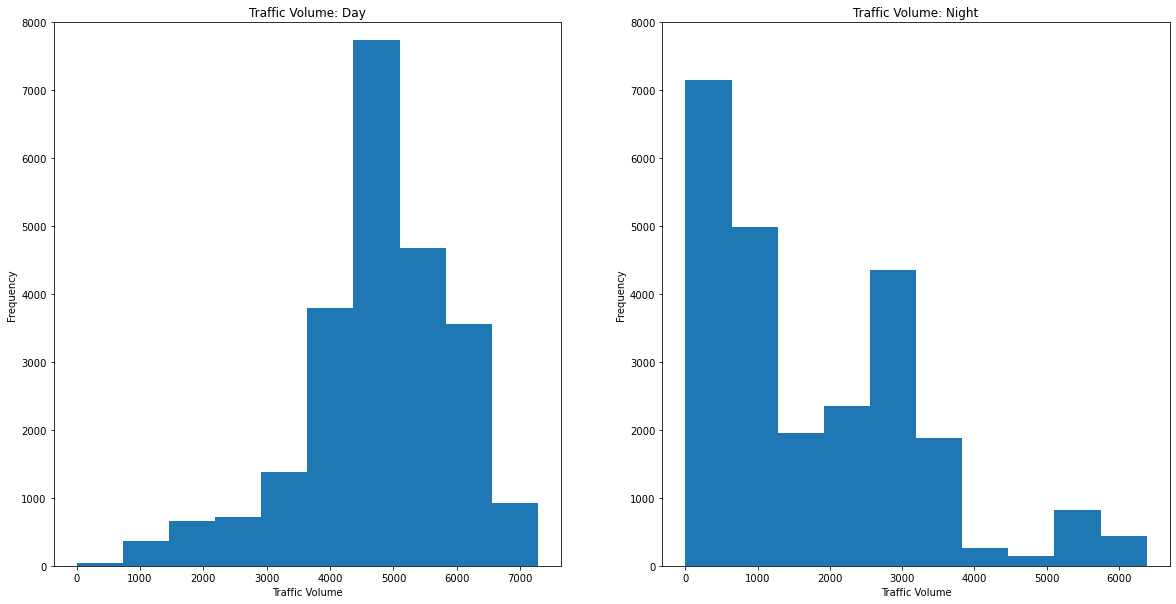

In [76]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.ylim([0, 8000])
plt.title('Traffic Volume: Day')
plt.xlabel('Traffic Volume')
daytime['traffic_volume'].plot.hist()

plt.subplot(1,2,2)
plt.ylim([0, 8000])
plt.title('Traffic Volume: Night')
plt.xlabel('Traffic Volume')
nighttime['traffic_volume'].plot.hist()

For traffic volume at day, we can see the histogram has a left-skewed distribution, this means that the traffic values for the day tend to be high.

For traffic volume at night, we can see the histogram hahs right-skewed distribution, this means that the traffic values for the night tend to be low.

In [73]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [74]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

We can also observe that most of the time during the day there is more traffic volume than at night.

Since we are looking for a range of values with high traffic, we will work with the `daytime`